#### import libs

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

#### list files

In [2]:
from os import listdir
from os.path import isfile, join

# create path to input
mypath = "../DataSets/Zillow"

# get all files
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# remove readme
list(filter(lambda a: a != 'README', onlyfiles))

# create paths
propertiesPath = mypath + "/properties_2016.csv"
samplePath = mypath + "/sample_submission.csv"
trainPath = mypath + "/train_2016.csv"
zillowDictPath = mypath + "/zillow_data_dictionary.xlsx"

#### check out train_2016.csv

In [3]:
train_df = pd.read_csv(trainPath, parse_dates=["transactiondate"])
train_df.shape

(90811, 3)

In [4]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


#### logerror is target

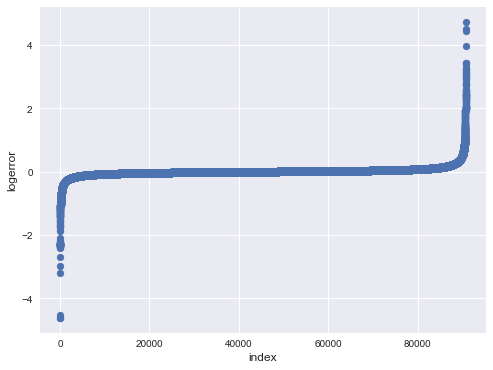

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

#### remove outliers

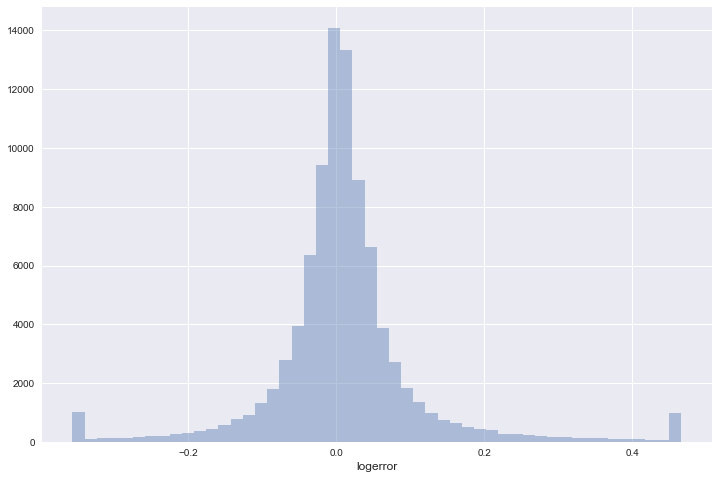

In [6]:
ulimit = np.percentile(train_df.logerror.values, 99)
llimit = np.percentile(train_df.logerror.values, 1)
train_df['logerror'].ix[train_df['logerror']>ulimit] = ulimit
train_df['logerror'].ix[train_df['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

#### check month

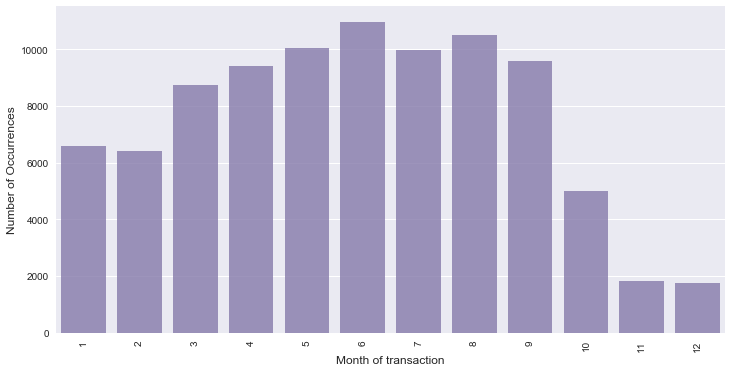

In [7]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month

cnt_srs = train_df['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

#### how often do u see the same parcelId?

In [8]:
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90554
2      127
3        1
Name: parcelid, dtype: int64